# Case 1 :  Decision Tree with Regression Problem

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [2]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [6]:
dataset = pd.get_dummies(dataset, columns=['State'], drop_first=True)

In [7]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [8]:
# split the data into ind variable and dep variable
x = dataset.drop(['Profit'], axis=1)
y = dataset[['Profit']]

In [15]:
x.describe()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,0.471212,0.478518
min,0.000000,51283.140000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,1.000000,1.000000


In [9]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [10]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [11]:
# split the data into training and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [30]:
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [31]:
y_pred_train = dtree_reg.predict(x_train)
y_pred_test = dtree_reg.predict(x_test)

In [32]:
from sklearn.metrics import r2_score

In [33]:
print("Training Accuracy :", r2_score(y_train, y_pred_train))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test))

Training Accuracy : 1.0

Test Accuracy : 0.8991076773388847


# RandomForest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [36]:
y_pred_train_rf = rf_reg.predict(x_train)
y_pred_test_rf = rf_reg.predict(x_test)

In [37]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_rf))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_rf))

Training Accuracy : 0.9849842906669529

Test Accuracy : 0.966780590901377


# Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred_train_lr = linear.predict(x_train)
y_pred_test_lr = linear.predict(x_test)

In [41]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_lr))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_lr))

Training Accuracy : 0.9398417195515446

Test Accuracy : 0.9783259006628308


# DecisionTree Classifier

In [91]:
df = pd.read_csv('penguins_lter.csv')
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181,.,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/2007,40.3,18.0,.,3250,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/2007,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426,NaN


In [92]:
df['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [93]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [94]:
df = df.drop(['studyName','Sample Number','Region','Stage','Individual ID','Date Egg',
              'Delta 15 N (o/oo)','Delta 13 C (o/oo)','Comments'], axis=1)

In [95]:
df.head()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181,.,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,.,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193,3450,FEMALE


In [96]:
df.describe()

,Culmen Length (mm),Culmen Depth (mm)
count,342.000000,342.000000
mean,43.921930,17.151170
std,5.459584,1.974793
min,32.100000,13.100000
25%,39.225000,15.600000
50%,44.450000,17.300000
75%,48.500000,18.700000
max,59.600000,21.500000


In [97]:
df.isnull().sum()/len(df)*100

Species                0.000000
Island                 0.000000
Clutch Completion      0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
Sex                    2.906977
dtype: float64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Clutch Completion    344 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    object 
 6   Body Mass (g)        342 non-null    object 
 7   Sex                  334 non-null    object 
dtypes: float64(2), object(6)
memory usage: 21.6+ KB


In [99]:
for i in df.columns:
    print("*************************************************",i,
         "**********************************************************")
    print()
    print(set(df[i].tolist()))
    print()

************************************************* Species **********************************************************

{'Gentoo penguin (Pygoscelis papua)', 'Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)'}

************************************************* Island **********************************************************

{'Torgersen', 'Biscoe', 'Dream'}

************************************************* Clutch Completion **********************************************************

{'No', 'Yes'}

************************************************* Culmen Length (mm) **********************************************************

{nan, nan, 49.4, 49.9, 37.3, 45.7, 50.4, 32.1, 33.1, 33.5, 35.6, 36.2, 35.7, 38.1, 35.2, 40.2, 41.5, 34.1, 34.6, 36.7, 37.8, 38.9, 39.5, 40.3, 42.0, 41.1, 42.5, 46.0, 44.1, 45.8, 46.5, 50.0, 51.3, 52.7, 51.7, 52.0, 58.0, 54.2, 55.8, 59.6, 47.7, 47.2, 48.2, 45.0, 50.2, 43.8, 34.4, 34.5, 34.0, 35.9, 35.3, 35.0, 35.1, 35.5, 36.6, 36.4, 3

<AxesSubplot:ylabel='Culmen Length (mm)'>

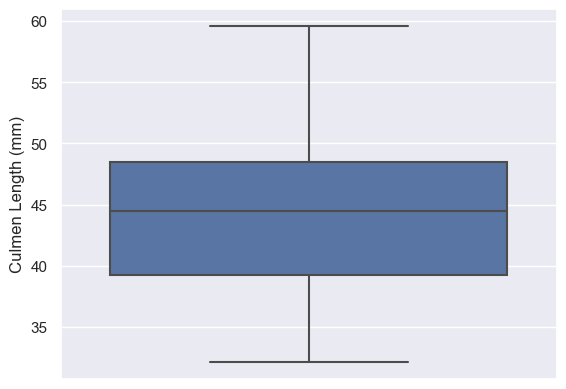

In [100]:
sns.boxplot(y = 'Culmen Length (mm)', data=df)

In [101]:
df['Culmen Length (mm)'] = df['Culmen Length (mm)'].fillna(df['Culmen Length (mm)'].mean())

<AxesSubplot:ylabel='Culmen Depth (mm)'>

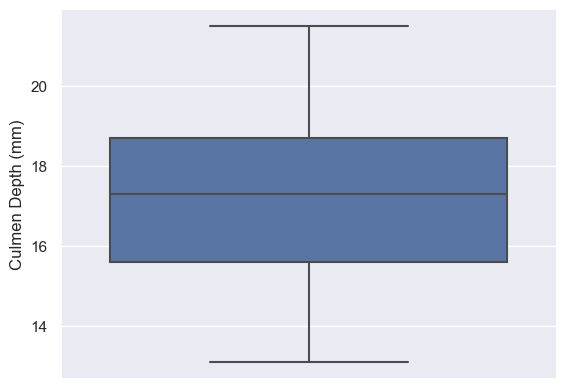

In [102]:
sns.boxplot(y='Culmen Depth (mm)', data=df)

In [103]:
df['Culmen Depth (mm)'] = df['Culmen Depth (mm)'].fillna(df['Culmen Depth (mm)'].mean())

In [104]:
df['Flipper Length (mm)'].value_counts()

190    22
187    16
195    16
193    15
210    14
191    13
215    12
196    10
197    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
230     7
192     7
181     7
189     7
184     7
188     6
222     6
201     6
213     6
217     6
199     6
214     6
209     5
219     5
218     5
221     5
203     5
180     5
194     5
178     4
200     4
228     4
225     4
202     4
205     3
224     3
182     3
223     2
183     2
229     2
211     2
207     2
231     1
176     1
174     1
.       1
206     1
172     1
179     1
226     1
Name: Flipper Length (mm), dtype: int64

In [105]:
df['Flipper Length (mm)'] = np.where(df['Flipper Length (mm)']=='.','190',df['Flipper Length (mm)'])

In [106]:
df['Flipper Length (mm)'] = pd.to_numeric(df['Flipper Length (mm)'])

In [107]:
df['Flipper Length (mm)'].mean()

200.90058479532163

In [108]:
df['Flipper Length (mm)'].median()

197.0

<AxesSubplot:ylabel='Flipper Length (mm)'>

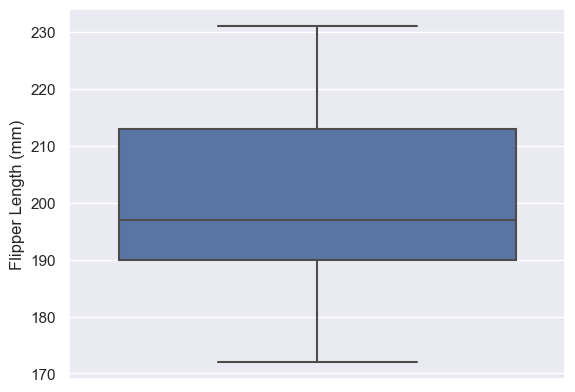

In [109]:
sns.boxplot(y='Flipper Length (mm)', data=df)

In [110]:
df['Flipper Length (mm)'] = df['Flipper Length (mm)'].fillna(df['Flipper Length (mm)'].mean())

In [111]:
df['Body Mass (g)'].value_counts()

3800    12
3700    11
3900    10
3950    10
3550     9
        ..
4475     1
3975     1
3575     1
3850     1
5750     1
Name: Body Mass (g), Length: 95, dtype: int64

In [112]:
df['Body Mass (g)'] = np.where(df['Body Mass (g)']=='.', np.nan, df['Body Mass (g)'])

In [113]:
df['Body Mass (g)'] = pd.to_numeric(df['Body Mass (g)'])

In [114]:
df['Body Mass (g)'].mean()

4203.07917888563

In [115]:
df['Body Mass (g)'].median()

4050.0

<AxesSubplot:ylabel='Body Mass (g)'>

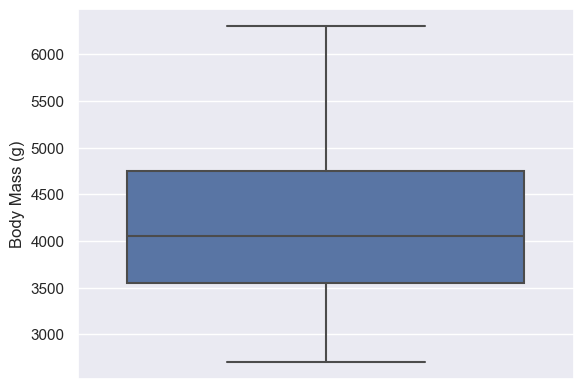

In [116]:
sns.boxplot(y='Body Mass (g)', data=df)

In [117]:
df['Body Mass (g)'] = df['Body Mass (g)'].fillna(df['Body Mass (g)'].mean())

In [118]:
df['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [119]:
df['Sex'] = np.where(df['Sex']=='.', 'MALE', df['Sex'])

In [120]:
df['Sex'] = df['Sex'].fillna('MALE')

In [121]:
df.isnull().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Clutch Completion    344 non-null    object 
 3   Culmen Length (mm)   344 non-null    float64
 4   Culmen Depth (mm)    344 non-null    float64
 5   Flipper Length (mm)  344 non-null    float64
 6   Body Mass (g)        344 non-null    float64
 7   Sex                  344 non-null    object 
dtypes: float64(4), object(4)
memory usage: 21.6+ KB


In [123]:
df['Species'] = df['Species'].astype('category')
df['Species'] = df['Species'].cat.codes

In [124]:
df.head()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,Torgersen,Yes,39.10000,18.70000,181.000000,4203.079179,MALE
1,0,Torgersen,Yes,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,0,Torgersen,Yes,40.30000,18.00000,190.000000,3250.000000,FEMALE
3,0,Torgersen,Yes,43.92193,17.15117,200.900585,4203.079179,MALE
4,0,Torgersen,Yes,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [125]:
df['Species'].value_counts()

0    152
2    124
1     68
Name: Species, dtype: int64

In [126]:
df = pd.get_dummies(df, columns=['Island','Clutch Completion','Sex'], drop_first=True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                344 non-null    int8   
 1   Culmen Length (mm)     344 non-null    float64
 2   Culmen Depth (mm)      344 non-null    float64
 3   Flipper Length (mm)    344 non-null    float64
 4   Body Mass (g)          344 non-null    float64
 5   Island_Dream           344 non-null    uint8  
 6   Island_Torgersen       344 non-null    uint8  
 7   Clutch Completion_Yes  344 non-null    uint8  
 8   Sex_MALE               344 non-null    uint8  
dtypes: float64(4), int8(1), uint8(4)
memory usage: 12.6 KB


In [128]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_MALE
0,0,39.10000,18.70000,181.000000,4203.079179,0,1,1,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,1,1,0
2,0,40.30000,18.00000,190.000000,3250.000000,0,1,1,0
3,0,43.92193,17.15117,200.900585,4203.079179,0,1,1,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,1,1,0


<AxesSubplot:>

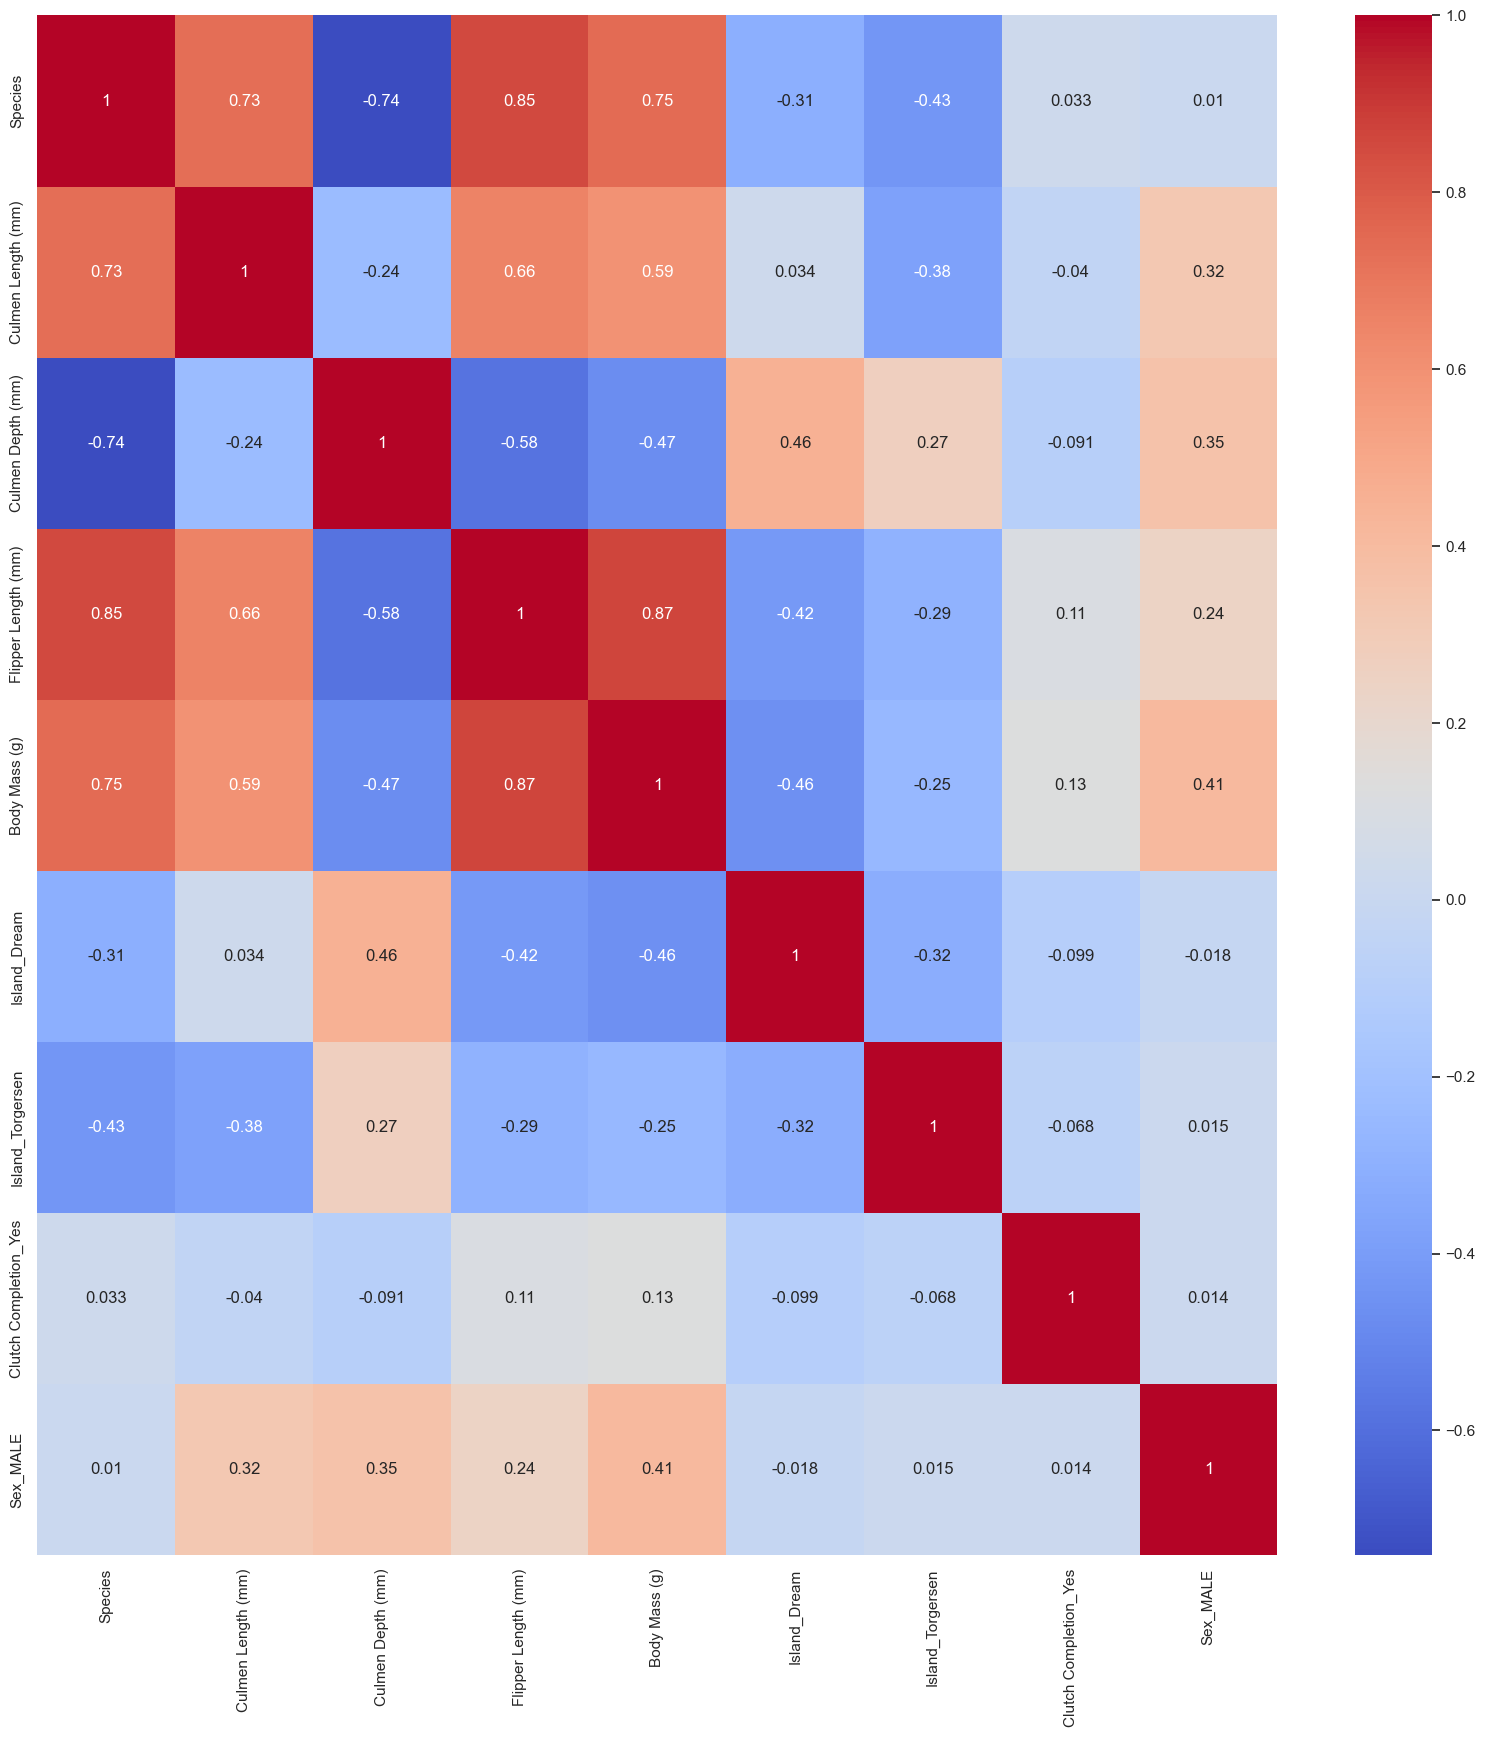

In [129]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

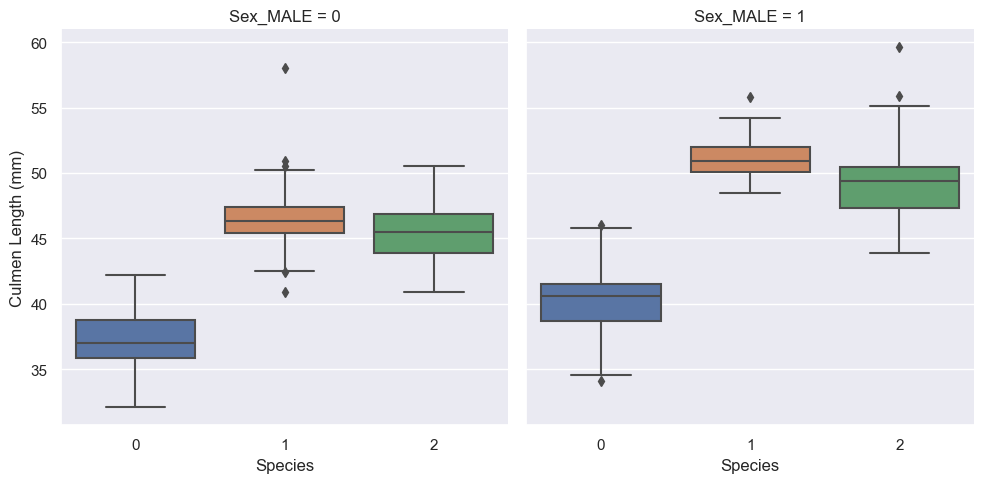

In [130]:
sns.catplot(data=df, x='Species', y='Culmen Length (mm)', kind='box', col='Sex_MALE')
plt.show()

<Figure size 1500x1200 with 0 Axes>

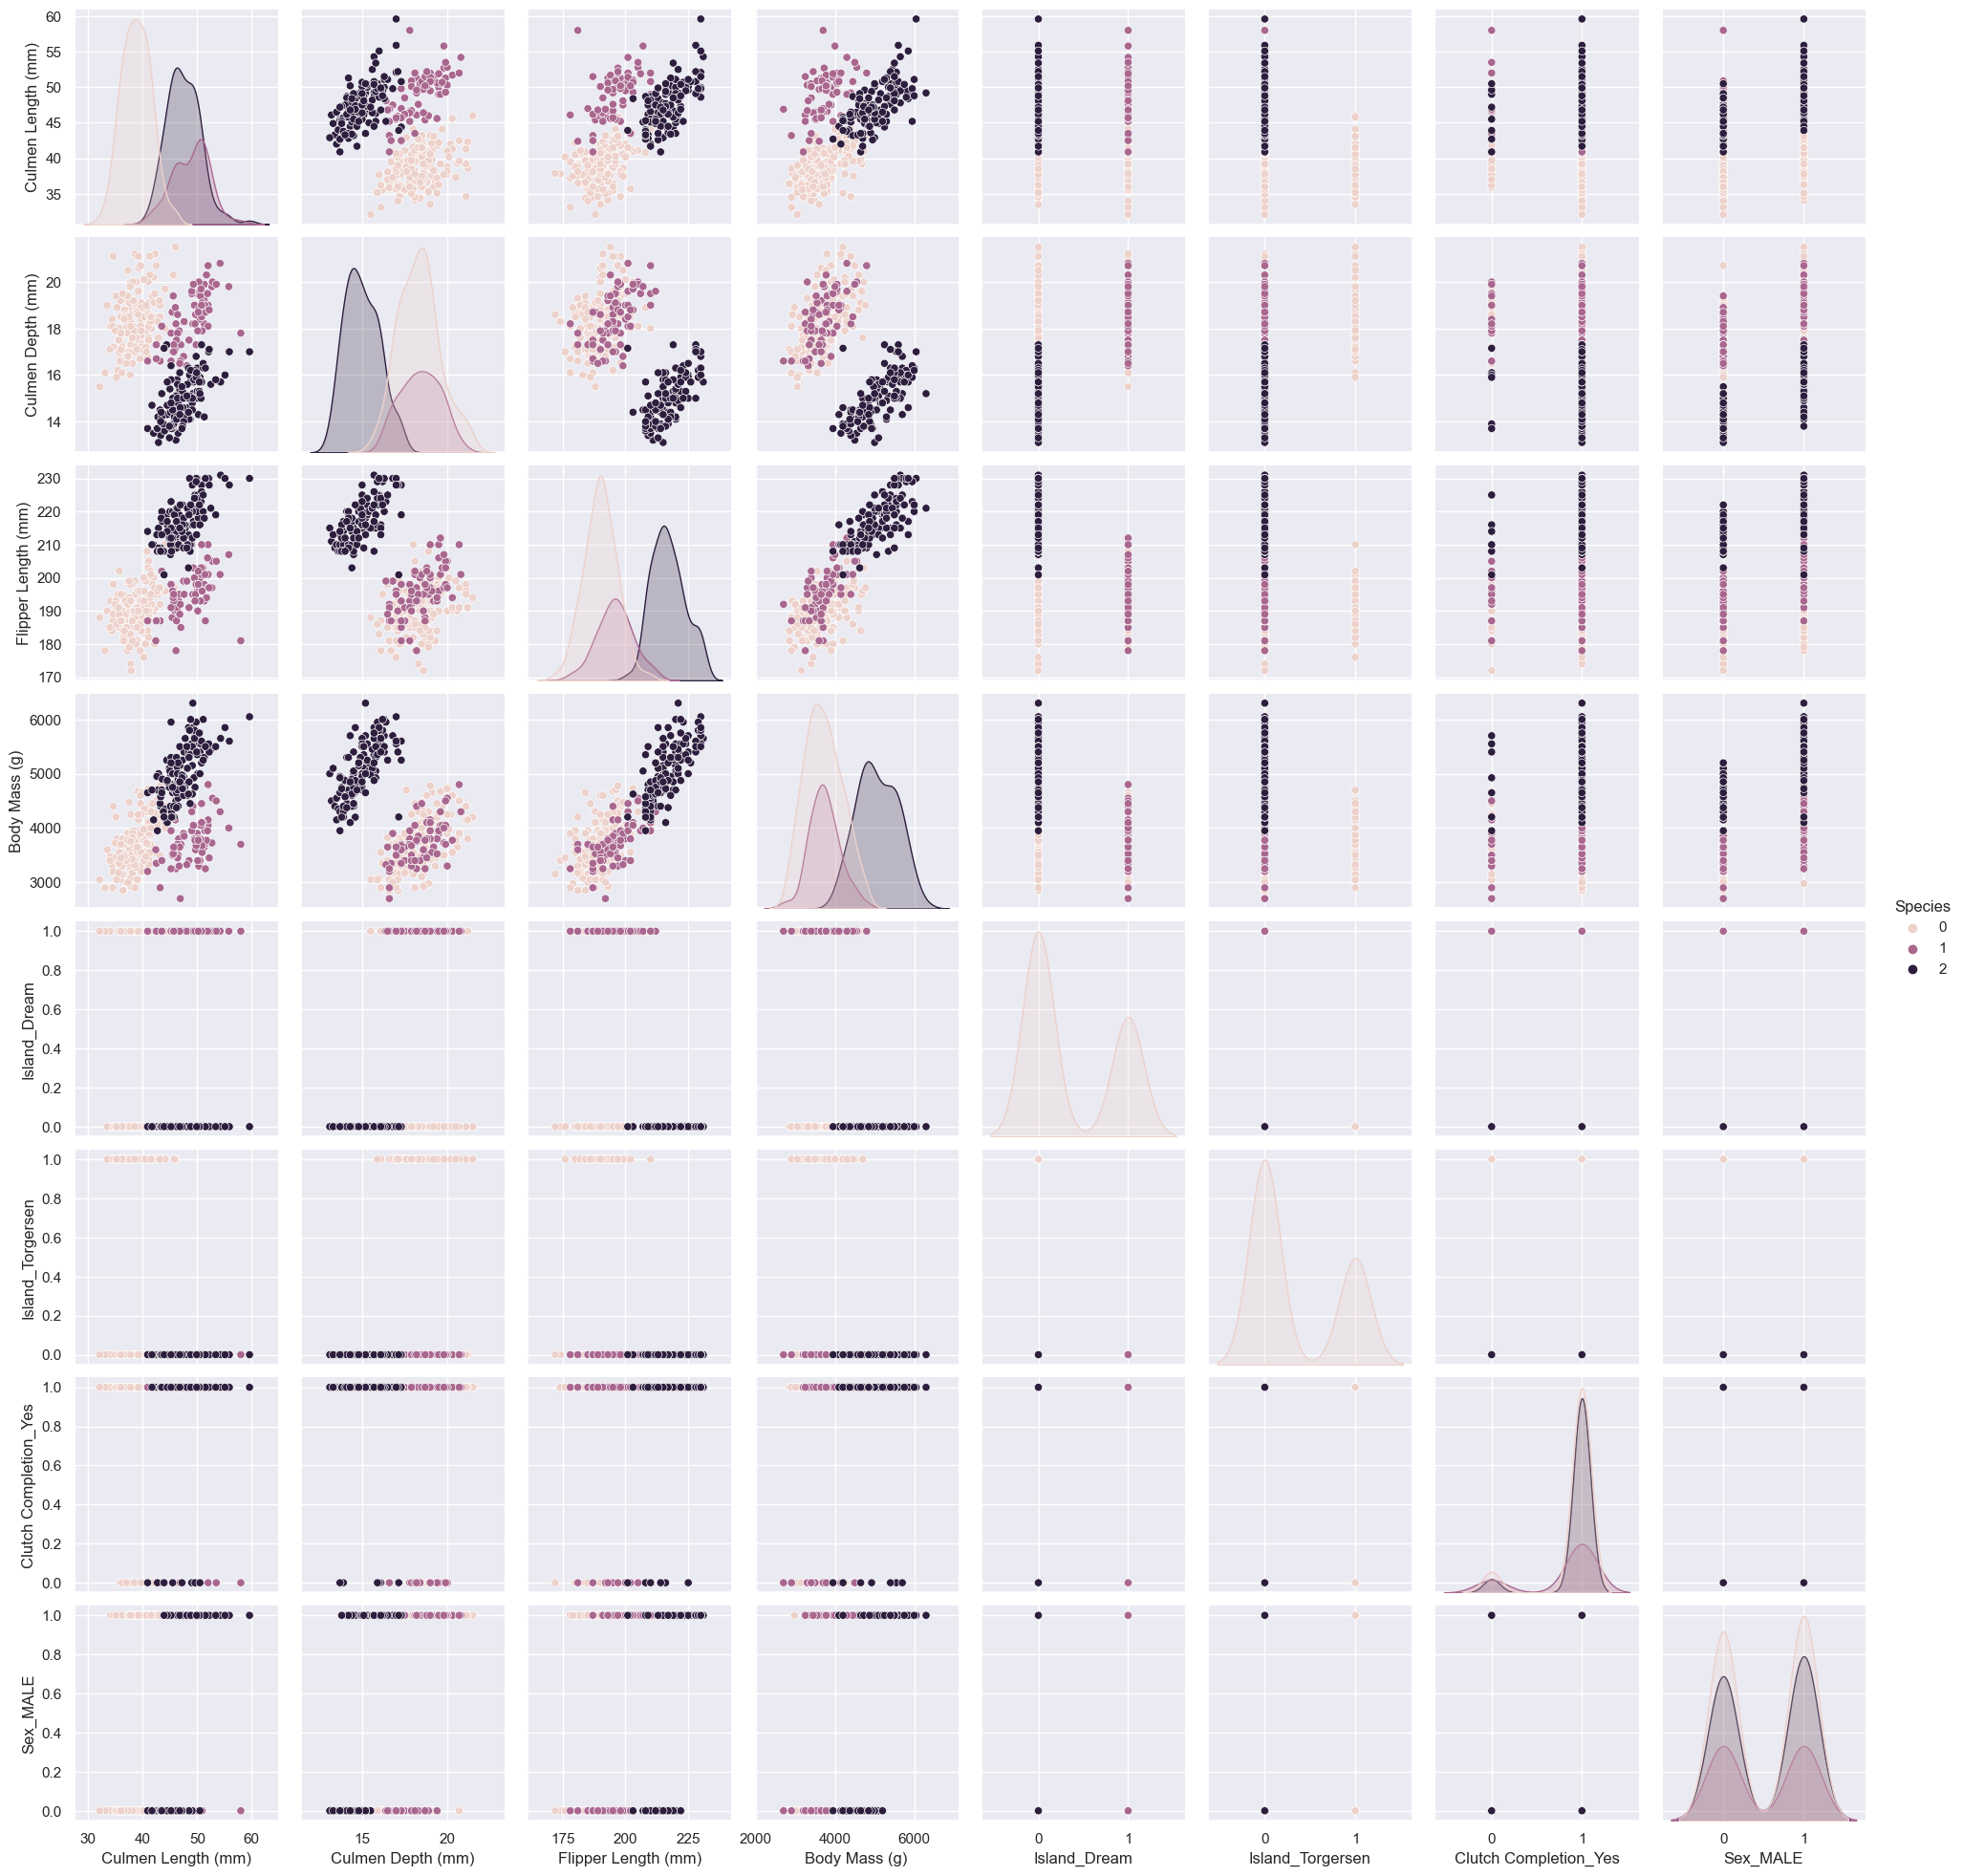

In [131]:
plt.figure(figsize=(15,12))
sns.pairplot(data=df, hue='Species')
plt.show()

In [132]:
df.head(2)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_MALE
0,0,39.1,18.7,181.0,4203.079179,0,1,1,1
1,0,39.5,17.4,186.0,3800.000000,0,1,1,0


In [133]:
# split the data into ind and dep variable
x = df.iloc[:,1:]
y = df[['Species']]

In [134]:
x.head(2)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_MALE
0,39.1,18.7,181.0,4203.079179,0,1,1,1
1,39.5,17.4,186.0,3800.000000,0,1,1,0


In [135]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [137]:
df['Species'].value_counts()/len(df)*100

0    44.186047
2    36.046512
1    19.767442
Name: Species, dtype: float64

In [138]:
# split the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101,
                                                   stratify=y)

# Building Decision Tree Classifier model

In [140]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(criterion='gini')
dtree1.fit(x_train, y_train)

dtree2 = DecisionTreeClassifier(criterion='entropy')
dtree2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [141]:
y_pred_dt1_train = dtree1.predict(x_train)
y_pred_dt1_test = dtree1.predict(x_test)

y_pred_dt2_train = dtree2.predict(x_train)
y_pred_dt2_test = dtree2.predict(x_test)

In [142]:
# Evaluation Matrix

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [143]:
print(confusion_matrix(y_train, y_pred_dt1_train))
print()
print(confusion_matrix(y_test, y_pred_dt1_test))
print()
print()
print(confusion_matrix(y_train, y_pred_dt2_train))
print()
print(confusion_matrix(y_test, y_pred_dt2_test))

[[114   0   0]
 [  0  51   0]
 [  0   0  93]]

[[34  4  0]
 [ 0 17  0]
 [ 0  0 31]]


[[114   0   0]
 [  0  51   0]
 [  0   0  93]]

[[34  3  1]
 [ 0 17  0]
 [ 0  0 31]]


In [144]:
print(classification_report(y_train, y_pred_dt1_train))
print()
print(classification_report(y_test, y_pred_dt1_test))
print()
print()
print(classification_report(y_train, y_pred_dt2_train))
print()
print(classification_report(y_test, y_pred_dt2_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        93

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258


              precision    recall  f1-score   support

           0       1.00      0.89      0.94        38
           1       0.81      1.00      0.89        17
           2       1.00      1.00      1.00        31

    accuracy                           0.95        86
   macro avg       0.94      0.96      0.95        86
weighted avg       0.96      0.95      0.95        86



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        93

    accuracy     

In [145]:
print("Gini Training Accuracy :",accuracy_score(y_train, y_pred_dt1_train))
print()
print("Gini Test Accuracy :",accuracy_score(y_test, y_pred_dt1_test))
print()
print()
print("Entropy Training Accuracy :",accuracy_score(y_train, y_pred_dt2_train))
print()
print("Entropy Test Accuracy :", accuracy_score(y_test, y_pred_dt2_test))

Gini Training Accuracy : 1.0

Gini Test Accuracy : 0.9534883720930233


Entropy Training Accuracy : 1.0

Entropy Test Accuracy : 0.9534883720930233


# cross validation

In [146]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(dtree1, x_train, y_train, cv=10)
print(training_accuracy)
print()
print("Training Mean Accuracy :", training_accuracy.mean())
print()
print(training_accuracy.max())

[1.         1.         0.92307692 0.96153846 1.         0.96153846
 0.96153846 0.92307692 1.         0.96      ]

Training Mean Accuracy : 0.9690769230769231

1.0


In [148]:
print("*******************Final Accuracy for Training and Test Result***********************")
print("Training Accuracy :", training_accuracy.mean())
print()
print("Test Accuracy :",accuracy_score(y_test, y_pred_dt1_test))

*******************Final Accuracy for Training and Test Result***********************
Training Accuracy : 0.9690769230769231

Test Accuracy : 0.9534883720930233


# Feature Importance Variable

In [149]:
dtree1.feature_importances_

array([0.37181782, 0.0721186 , 0.51298026, 0.        , 0.01016116,
       0.0060967 , 0.00435478, 0.02247068])

In [150]:
pd.DataFrame(index=x.columns, data=dtree1.feature_importances_, columns=['Feature Importance'])

,Feature Importance
Culmen Length (mm),0.371818
Culmen Depth (mm),0.072119
Flipper Length (mm),0.512980
Body Mass (g),0.000000
Island_Dream,0.010161
Island_Torgersen,0.006097
Clutch Completion_Yes,0.004355
Sex_MALE,0.022471


# DecisionTree Visualization

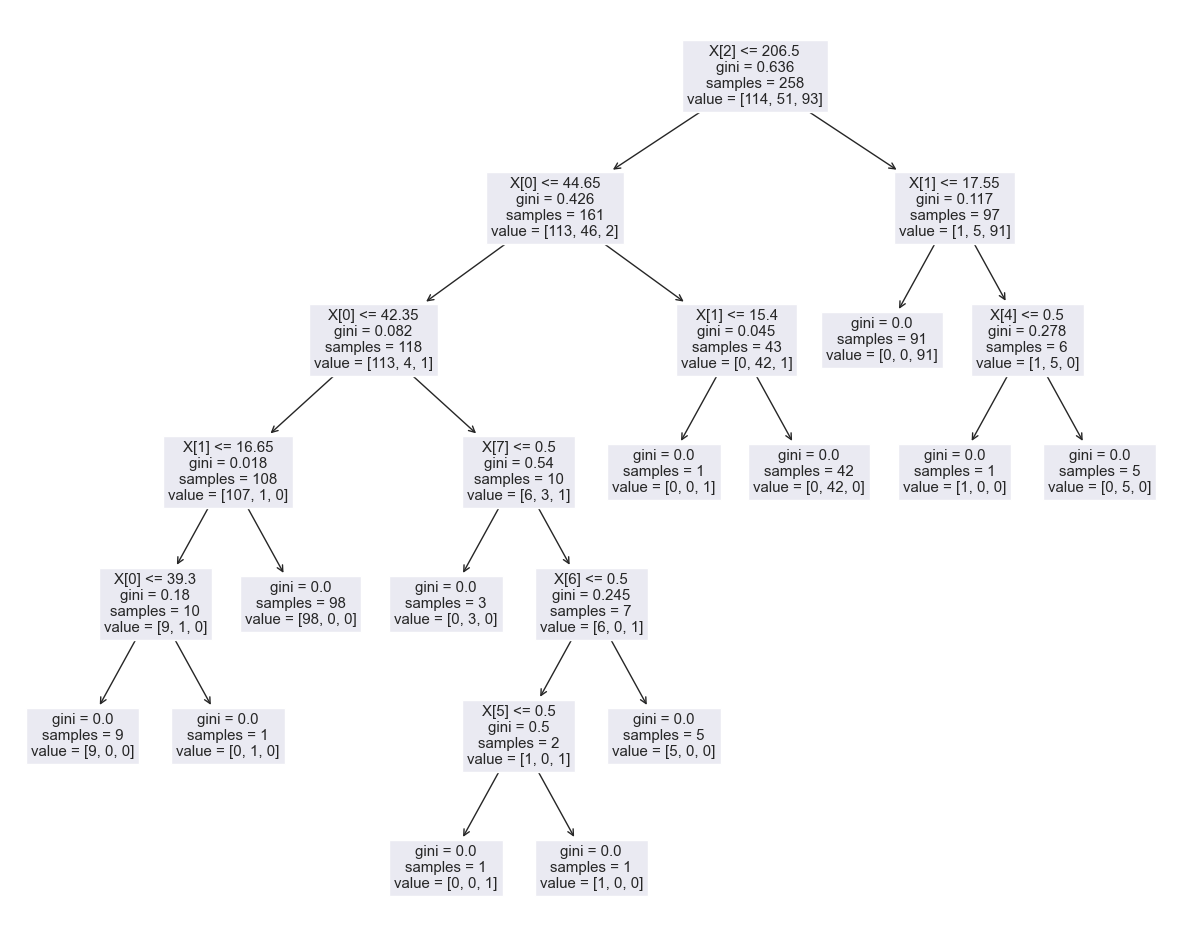

In [151]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12))
plot_tree(dtree1)
plt.show()

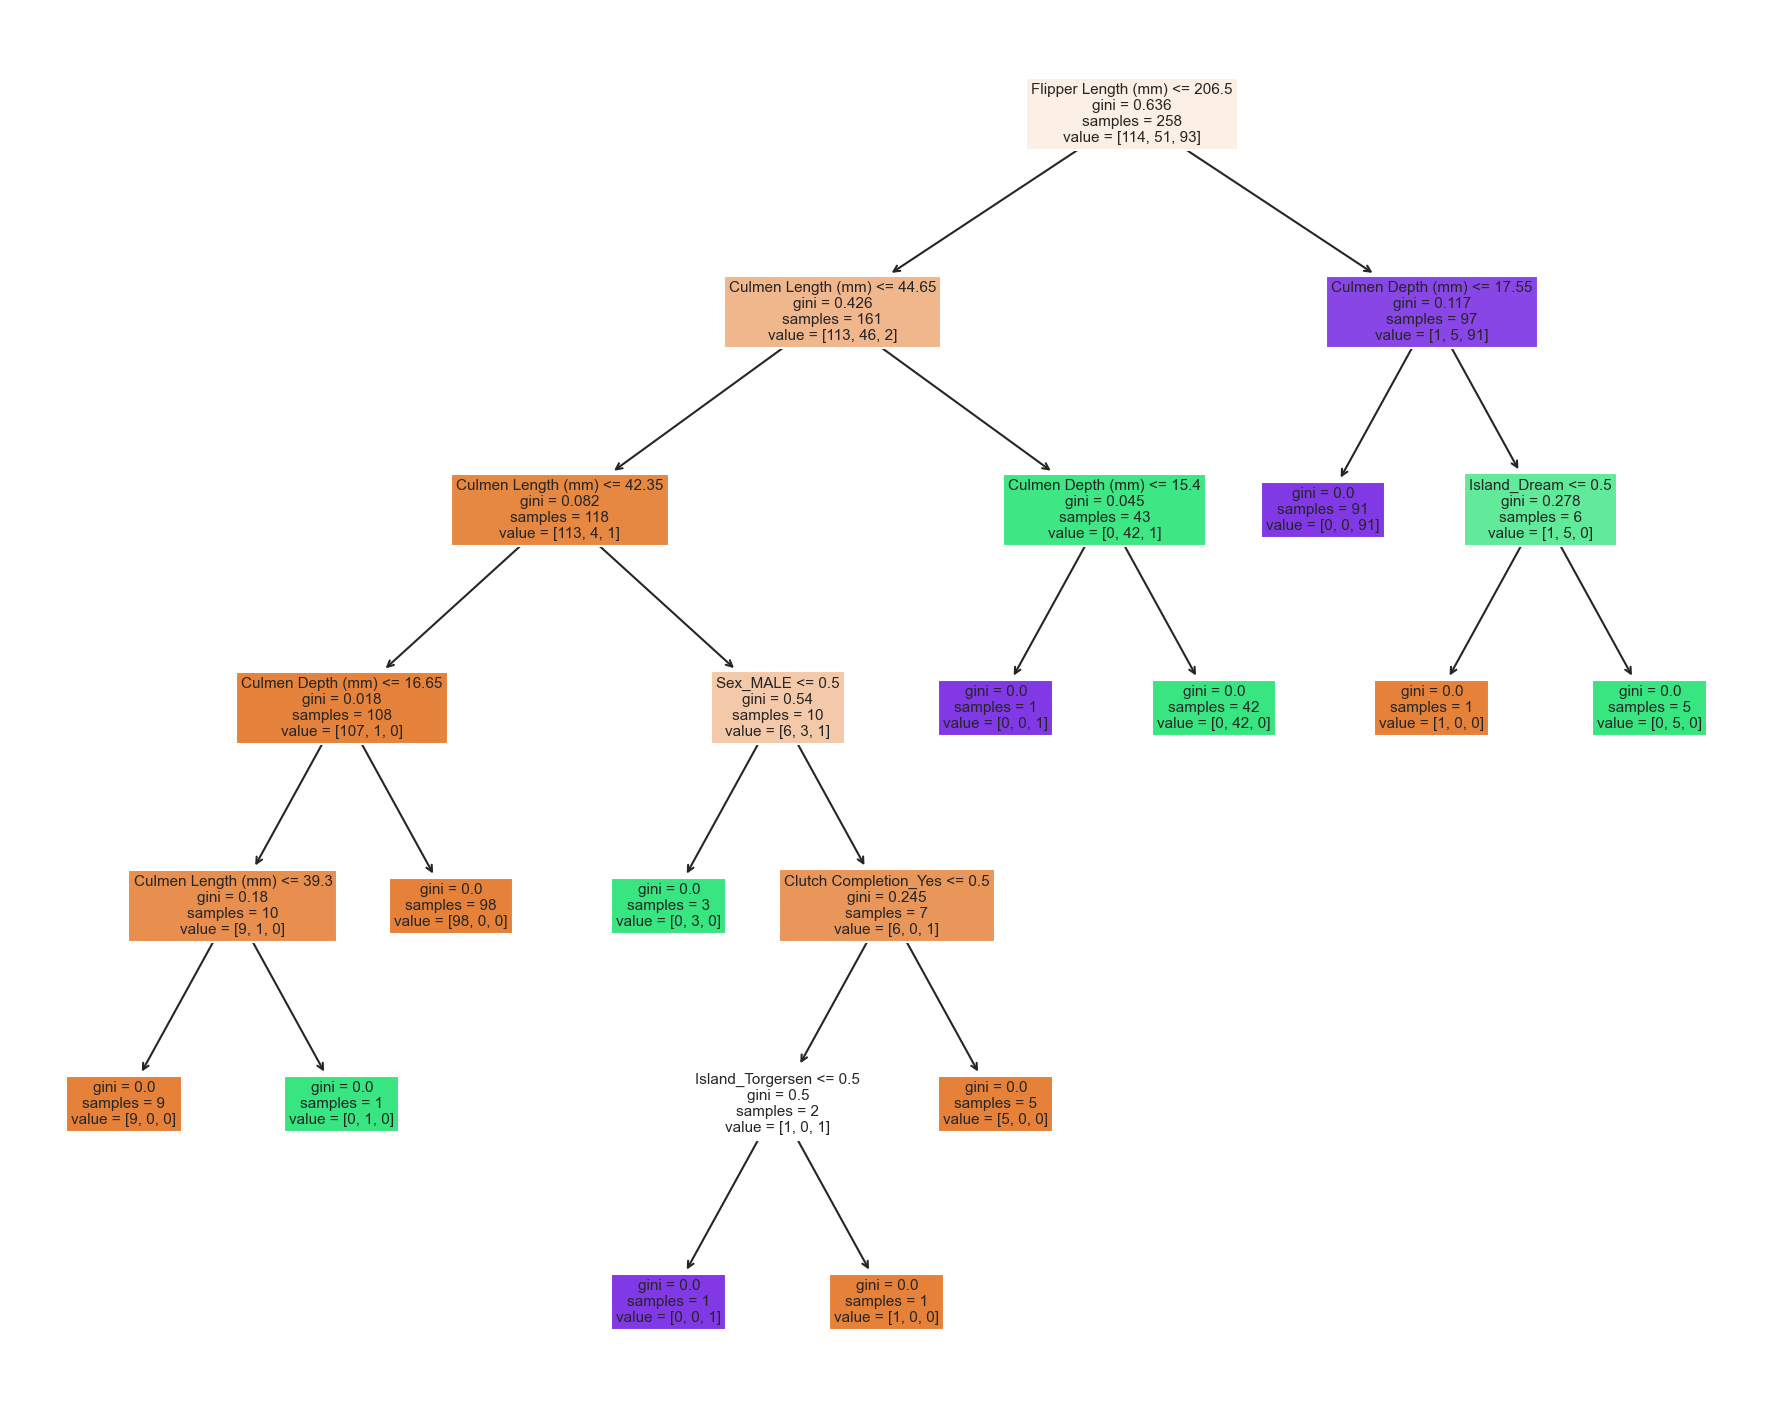

In [152]:
plt.figure(figsize=(15,12), dpi=150)
plot_tree(dtree1, filled=True, feature_names = x.columns)
plt.show()

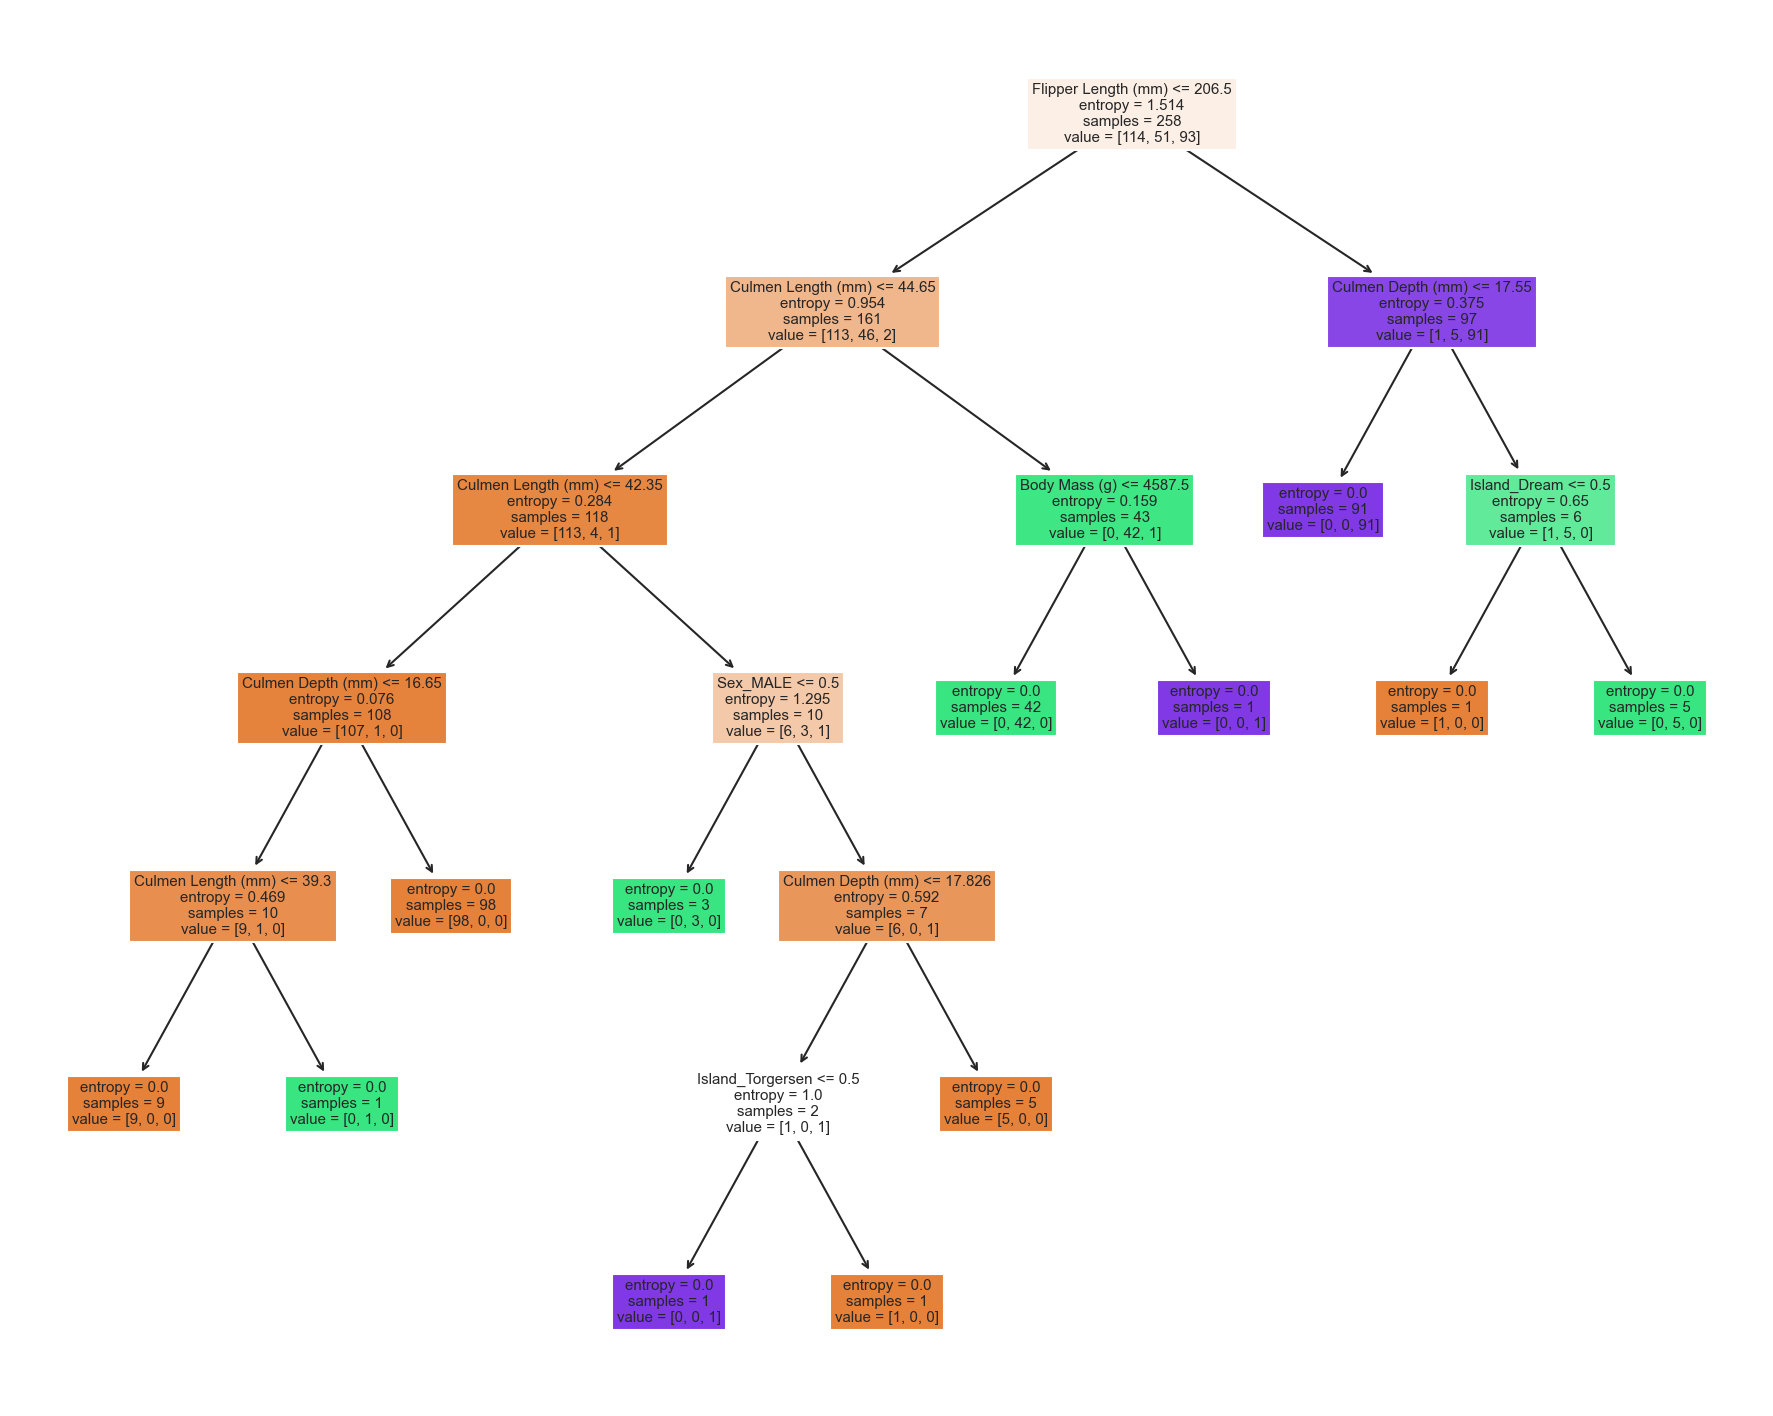

In [153]:
plt.figure(figsize=(15,12), dpi=150)
plot_tree(dtree2, filled=True, feature_names = x.columns)
plt.show()

In [ ]:
# Overfitting - Prunning (pre-prunning and post-prunning)

In [157]:
def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test, model_preds))
    print(accuracy_score(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(15,12), dpi=150)
    plot_tree(model, filled=True, feature_names=x.columns)

In [158]:
# HyperParameters tuning in DT
prunned_dt = DecisionTreeClassifier(max_depth=3)
prunned_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        38
           1       0.94      0.88      0.91        17
           2       0.91      1.00      0.95        31

    accuracy                           0.93        86
   macro avg       0.93      0.93      0.93        86
weighted avg       0.93      0.93      0.93        86

0.9302325581395349




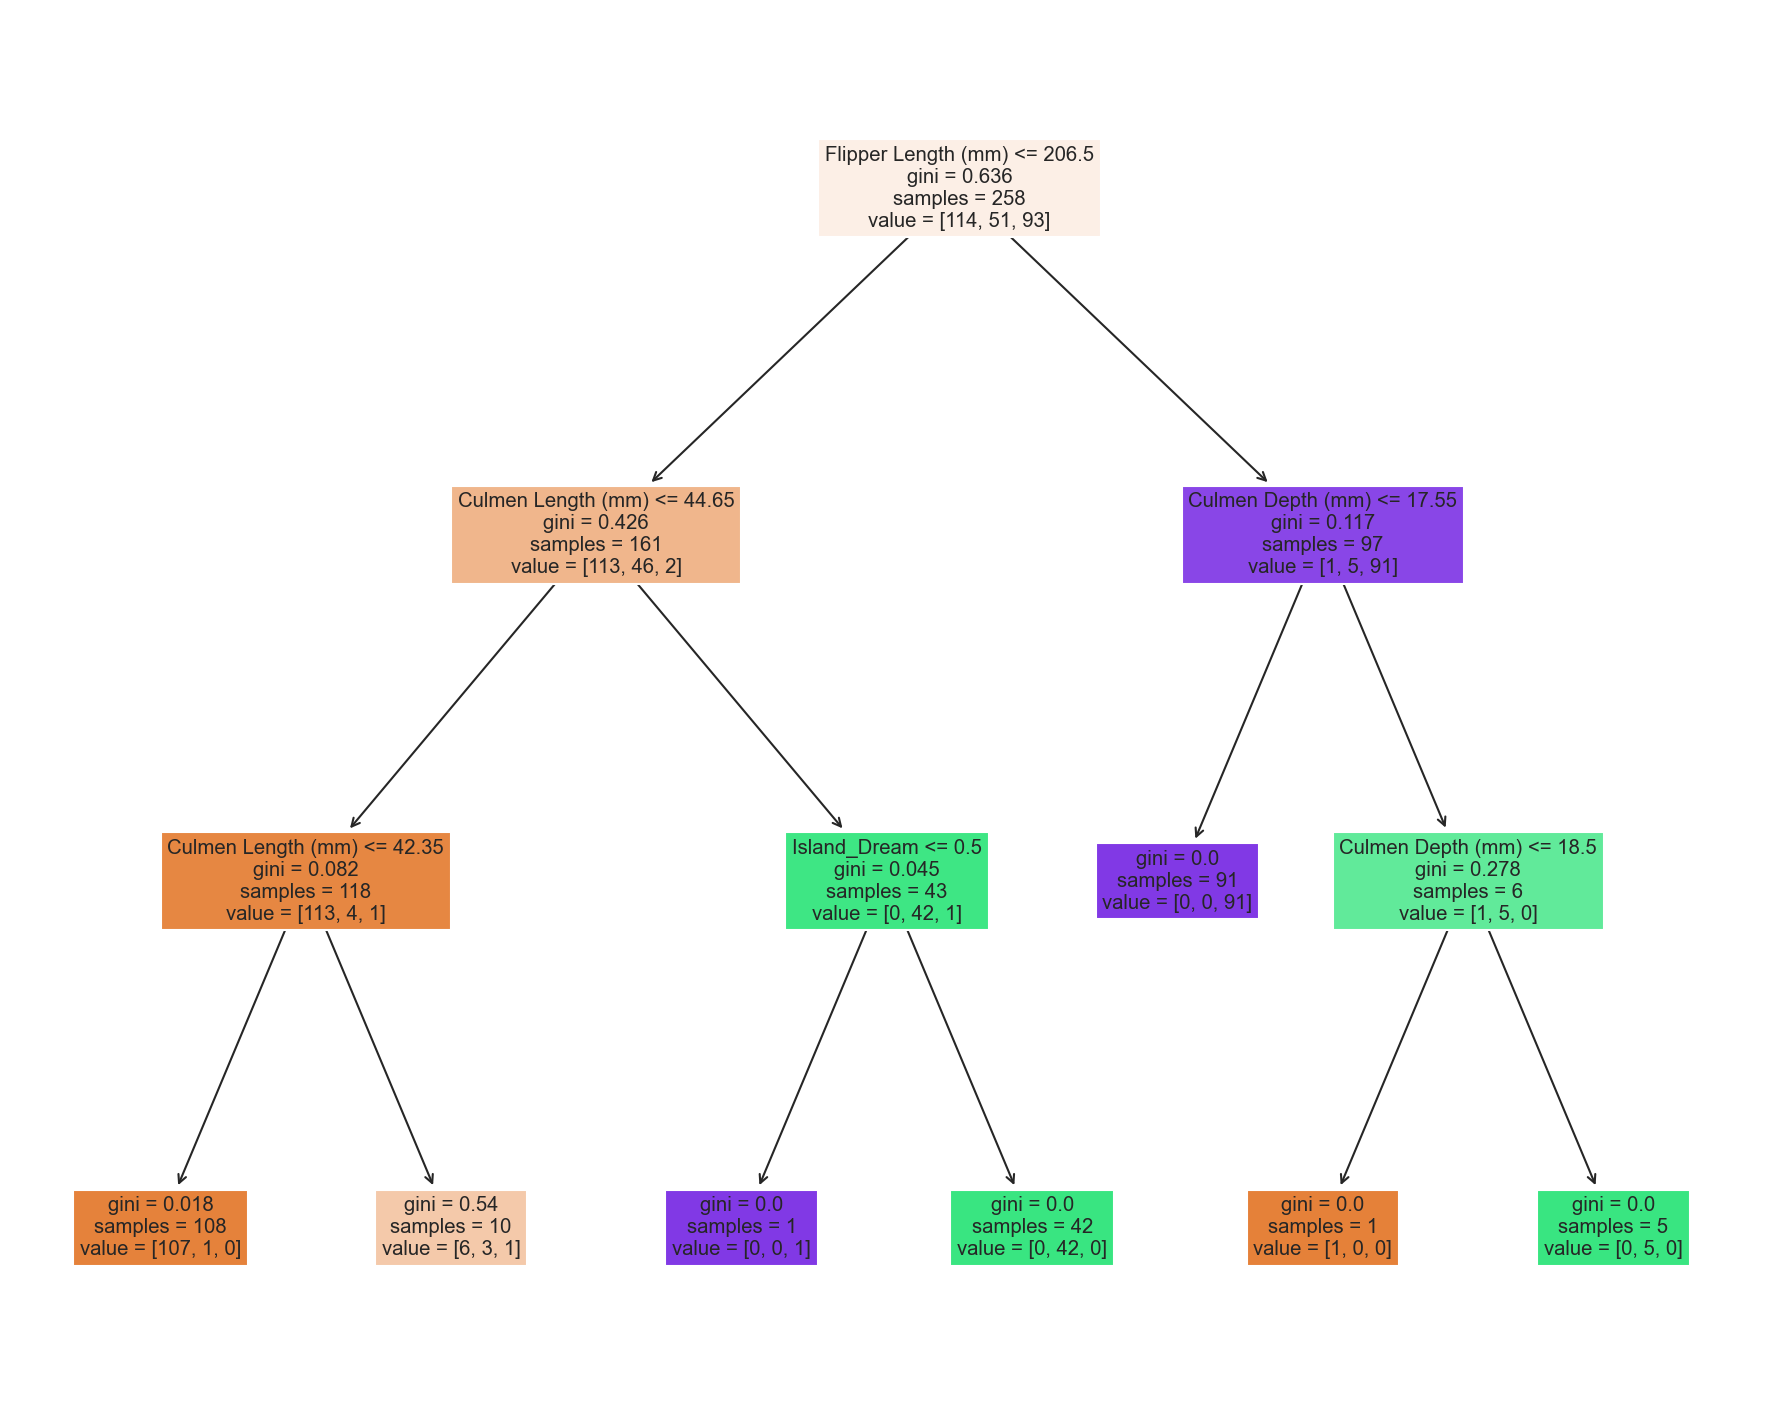

In [159]:
report_model(prunned_dt)

In [160]:
# HyperParameters tuning in DT
prunned_dt1 = DecisionTreeClassifier(max_leaf_nodes=3)
prunned_dt1.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        38
           1       0.83      0.88      0.86        17
           2       0.97      1.00      0.98        31

    accuracy                           0.93        86
   macro avg       0.92      0.93      0.92        86
weighted avg       0.93      0.93      0.93        86

0.9302325581395349




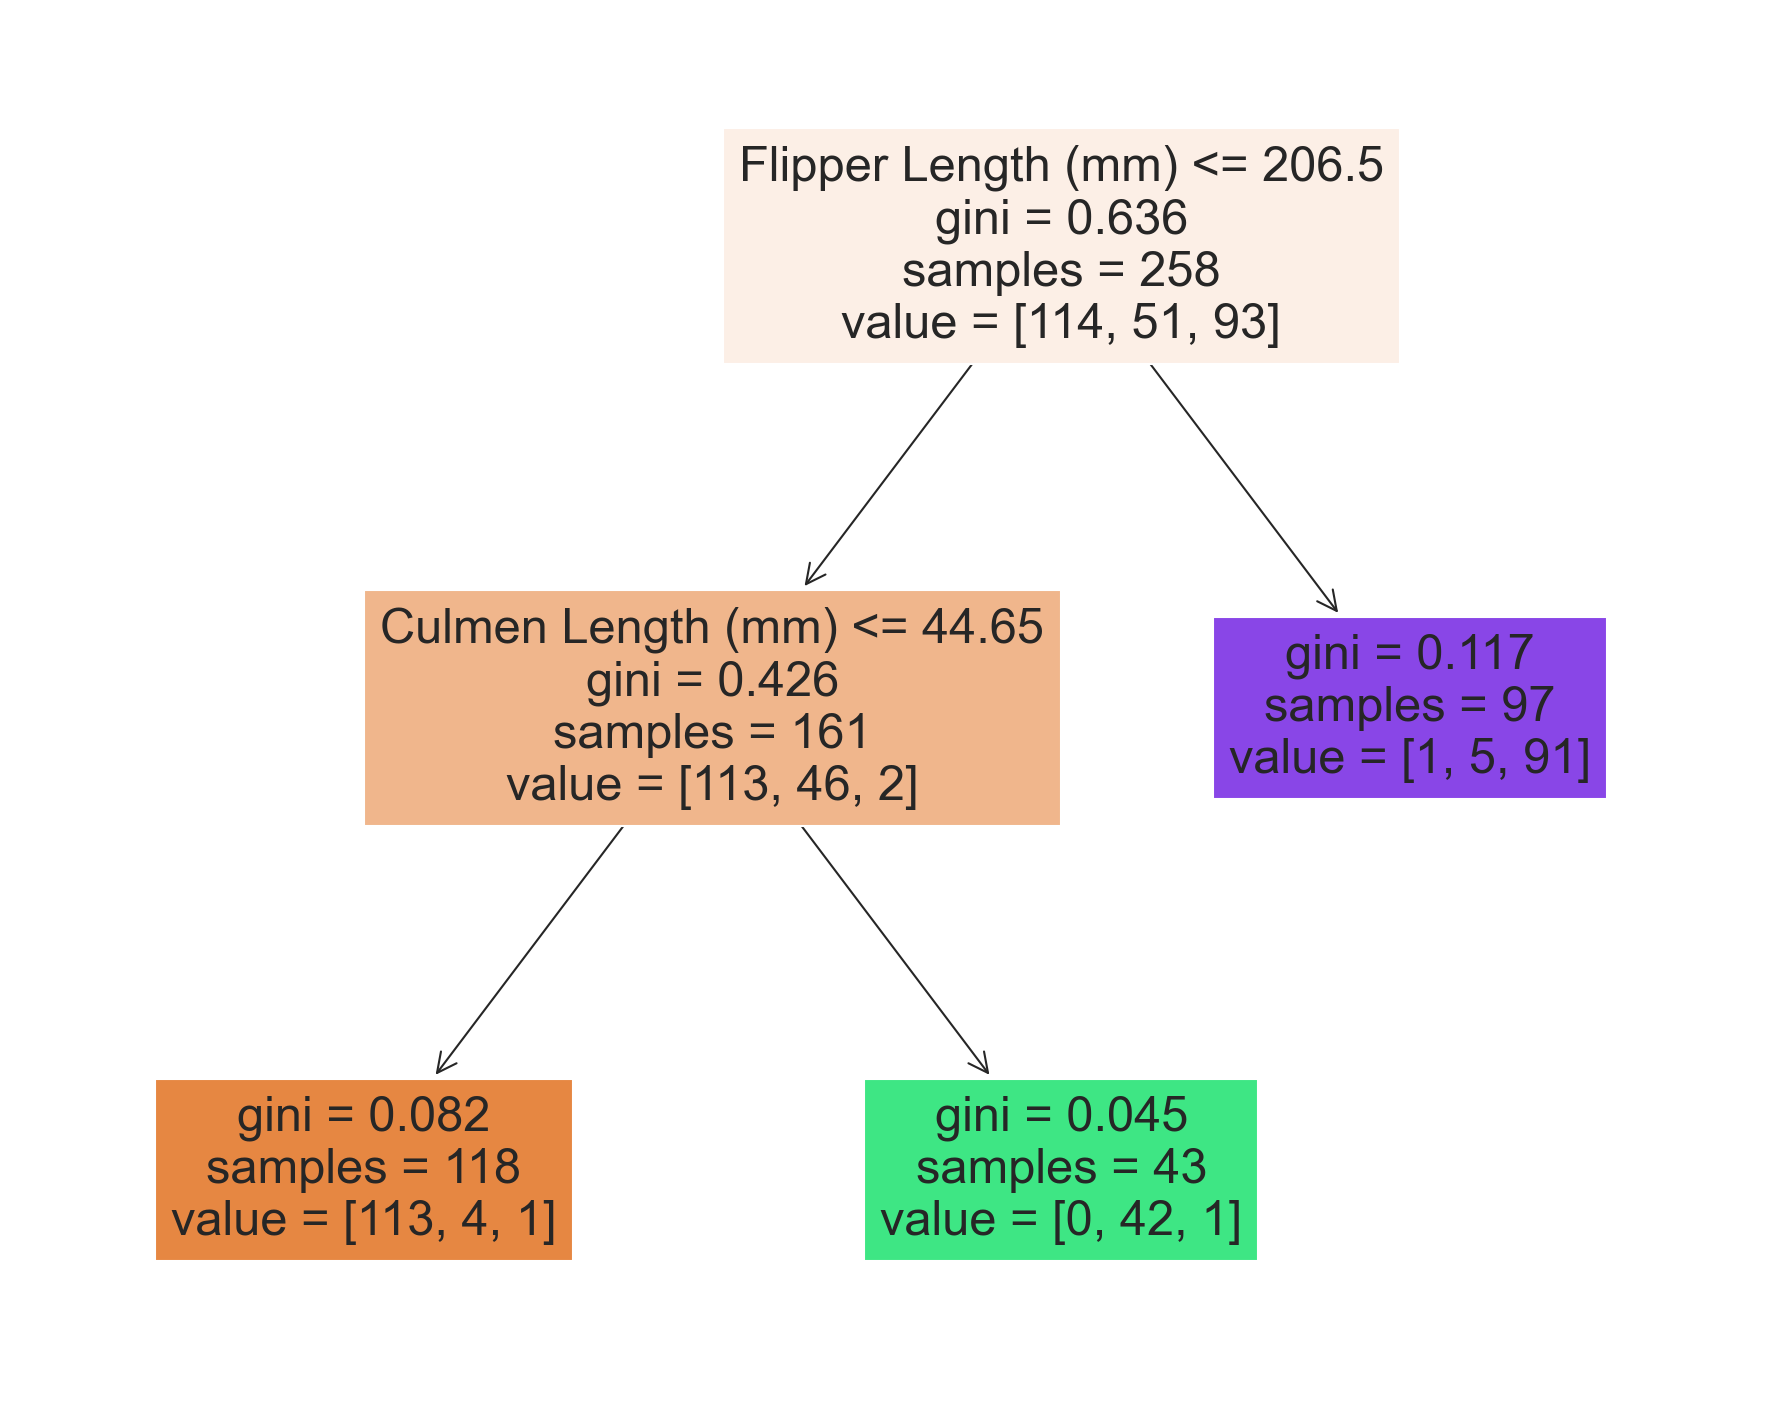

In [161]:
report_model(prunned_dt1)

# The End - DecisionTree